# Guía 1 - Grupo 2
### Matías Bergerman, Pablo González Leiro, Tobias Demeco, Matías Tripoli

In [56]:
# Import modules
from PIL import Image
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from collections import namedtuple


## Pregunta 1

In [57]:
rho = 150000    # elementos/mm^2 (densidad de conos)
A = 1.5**2      # mm^2 (área del sensor)
d = 15          # mm (distancia focal del ojo)
L = 300         # mm (distancia al pixel)

Conociendo la densidad de elementos, $\rho$, podemos saber el área aproximada de un cono y su radio, pues:

In [58]:
Ac = 1/rho
print('Área de un cono =', Ac, 'mm^2')
rc = np.sqrt(Ac)/np.pi
print('Radio de un cono =', rc, 'mm')

Área de un cono = 6.666666666666667e-06 mm^2
Radio de un cono = 0.0008218725920819998 mm


Luego, considerando lo escrito en la consigna buscamos el limite de resolución suponiendo que si el área de la imagen es menor a la de un cono esta no sera visible, entonces podemos encontrar la máxima agudeza visual:

In [59]:
theta = 2*np.arctan(rc/d)*180/np.pi
print('theta =', theta, 'grados')

theta = 0.006278644103553703 grados


Finalmente, podemos despejar el tamaño mínimo del pixel:

In [60]:

X = 2*L*np.tan(np.pi/180*theta/2)
print('Altura mínima =', X, 'mm')
Ax = X**2
print('Área míninma =', Ax, 'mm^2')

Altura mínima = 0.03287490368327999 mm
Área míninma = 0.0010807592921849363 mm^2


In [61]:
print('Diferencia de magnitud entre áreas (Objeto/Cono) =', Ax/Ac)
print('Diferencia de magnitud entre anchos (Objeto/Cono) =', X/(2*rc))

Diferencia de magnitud entre áreas (Objeto/Cono) = 162.11389382774044
Diferencia de magnitud entre anchos (Objeto/Cono) = 20.0


In [62]:
pixel = 0.26    # mm
Ap = pixel**2   # mm^2

print('Diferencia de magnitud entre áreas (Objeto/Pixel) =', Ax/Ap)
print('Diferencia de magnitud entre anchos (Objeto/Pixel) =', X/pixel)

Diferencia de magnitud entre áreas (Objeto/Pixel) = 0.015987563493860005
Diferencia de magnitud entre anchos (Objeto/Pixel) = 0.12644193724338457


Por lo tanto podemos ver que el área de un pixel es aproximadamente 10 veces mayo a la del objeto, por lo que el cono podría detectarlo

## Pregunta 2

![Imagen](https://scientificimaging.com/wp-content/uploads/2021/01/lens-WD-focal-length-AFOV-and-FOV-1-1024x576.png)

* Por simetría de triángulos, un triángulo isósceles de $10\ mm$ de base y $35\ mm$ de altura es semejante a uno de $1000\ mm$ de altura y $285.714\ mm$ de base.
* Dividiendo esta longitud por la cantidad de pixeles por linea (1000px) nos da una longitud por pixel del objeto igual a $0.285714\ mm$

## Pregunta 3

<table><tr>
<td> <img src="img/iso-rag-con_tripode.jpg" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="img/iso-rag-sin_tripode.jpg" alt="Drawing" style="width: 300px;"/> </td>
</tr>
<tr>
<td><p>Imagen con trípode</p></td>
<td><p>Imagen sin trípode</p></td>
</tr>
</table>

Vemos las imágenes obtenidas con y sin trípode, obtenidas con un iPhone XS (cámara principal de 12Mpx, cada píxel de tamaño 1.4um) a una distancia de 25cm. La distancia focal de la cámara es 28mm.

Medimos una resolución en la imagen obtenida de 0.25mm aproximadamente. No se observaron diferencias entre las imágenes con y sin trípode, posiblemente debido a la resolución de la impresora (600 ppi) y al proprio procesamiento que hace el celular.

25cm -> 0.25mm

28mm -> pixel size

pixel size (medido) = 28um

pixel size (specs) = 1.4um

Entonces la resolución medida en este experimento es 20 veces menos que la especificada, es decir 12Mpx/20 = 0.6Mpx.

## Pregunta 4

Para poder visualizar las imágenes con mayor facilidad, ambos cuadrados se muestran adyacentes unos a los otros y se usa un escalamiento x20 con el algoritmo *nearest neighbours*.

En cada caso se eligen diferentes colores de contorno y los puntos centrales se ajustaron hasta que perceptualmente se vean iguales, a pesar de que tengan un valor absoluto distinto.

Como conclusión, podemos ver que el contexto en el cual se perciba el color de cada pixel afecta la percepción de los mismos. Como seres humanos, nuestra visión se adapta a cada contexto y compensa automáticamente la percepción subjetiva de los colores de forma subconsciente e inevitable.

Colores de contorno: 63, 223
Colores del punto central: 100, 150


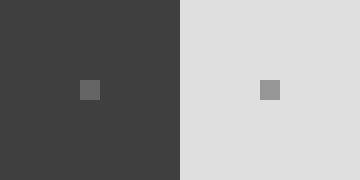

Colores de contorno: 0, 255
Colores del punto central: 100, 150


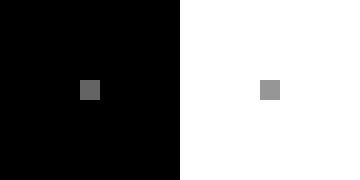

Colores de contorno: 150, 250
Colores del punto central: 100, 150


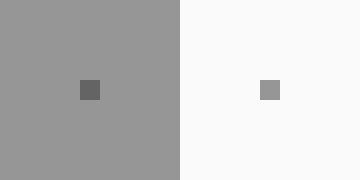

Colores de contorno: 20, 120
Colores del punto central: 120, 140


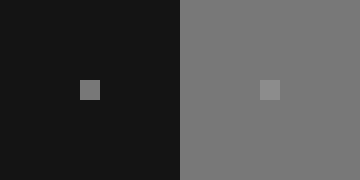

In [63]:
def make_squares(color_out_1, color_out_2, color_in_1, color_in_2, size=(9, 9)):
    c0, c1 = size[0]//2, size[1]//2
    a = np.full(size, color_out_1)
    a[c0, c1] = color_in_1
    b = np.full(size, color_out_2)
    b[c0, c1] = color_in_2
    joined_image = np.concatenate((a, b), axis=1)
    im = Image.fromarray(joined_image.astype(np.uint8), mode="L")
    return im

scale = 20

print("Colores de contorno: 63, 223\nColores del punto central: 100, 150")
im = make_squares(63, 223, 100, 150)
display(im.resize(np.array(im.size)*scale, Image.Resampling.NEAREST))

print("Colores de contorno: 0, 255\nColores del punto central: 100, 150")
im = make_squares(0, 255, 100, 150)
display(im.resize(np.array(im.size)*scale, Image.Resampling.NEAREST))

print("Colores de contorno: 150, 250\nColores del punto central: 100, 150")
im = make_squares(150, 250, 100, 150)
display(im.resize(np.array(im.size)*scale, Image.Resampling.NEAREST))

print("Colores de contorno: 20, 120\nColores del punto central: 120, 140")
im = make_squares(20, 120, 120, 140)
display(im.resize(np.array(im.size)*scale, Image.Resampling.NEAREST))

## Pregunta 5

En este caso también se realiza un escalamiento a 256x256 pixeles con el algoritmo *nearest neighbours* para poder visualizar mejor los resultados.

Se puede ver que hay una imagen de Daniel Jacoby superpuesta con la imagen original.

El caso de promediar los pixeles de cada bloque no sólo remueve la presencia de esta imagen superpuesta, sino que además es la que perceptualmente mejor calidad obtiene entre los diferentes esquemas de submuestreo.

Imagen original de 256px x 256px


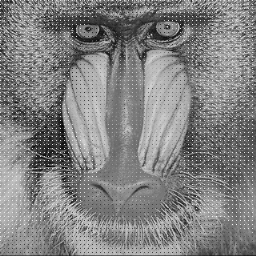

Imagen formada por el pixel (0,0) de cada bloque de 4x4


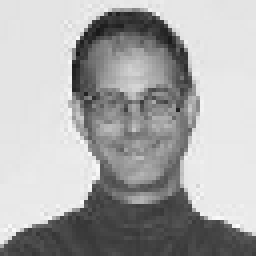

Imagen formada por el pixel (1,1) de cada bloque de 4x4


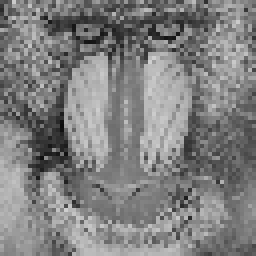

Imagen formada por el pixel (2,2) de cada bloque de 4x4


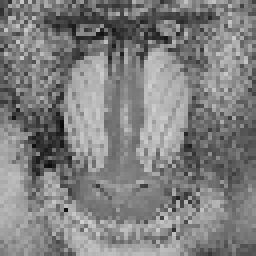

Imagen formada por promedio de cada bloque de 4x4


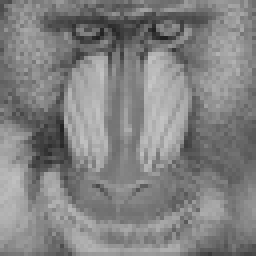

In [64]:
with Image.open("img/mono.bmp") as im:
    arr = np.asarray(im)
    M = 4
    blocks = [arr[x:x+M, y:y+M] for x in range(0,arr.shape[0],M) for y in range(0,arr.shape[1],M)]

blocks00 = [block[0,0] for block in blocks]
arr00 = np.asarray(blocks00).reshape(64,64)
im00 = Image.fromarray(arr00, mode="L").resize((256,256), Image.Resampling.NEAREST)

blocks11 = [block[1,1] for block in blocks]
arr11 = np.asarray(blocks11).reshape(64,64)
im11 = Image.fromarray(arr11, mode="L").resize((256,256), Image.Resampling.NEAREST)

blocks22 = [block[2,2] for block in blocks]
arr22 = np.asarray(blocks22).reshape(64,64)
im22 = Image.fromarray(arr22, mode="L").resize((256,256), Image.Resampling.NEAREST)

blocks_avg = [np.average(block) for block in blocks]
arr_avg = np.asarray(blocks_avg).astype(np.uint8).reshape(64,64)
im_avg = Image.fromarray(arr_avg, mode="L").resize((256,256), Image.Resampling.NEAREST)

print("Imagen original de 256px x 256px")
display(im)
print("Imagen formada por el pixel (0,0) de cada bloque de 4x4")
display(im00)
print("Imagen formada por el pixel (1,1) de cada bloque de 4x4")
display(im11)
print("Imagen formada por el pixel (2,2) de cada bloque de 4x4")
display(im22)
print("Imagen formada por promedio de cada bloque de 4x4")
display(im_avg)

### Implementación de la interpolación bilinear

[Wikipedia - Bilinear interpolation](https://en.wikipedia.org/wiki/Bilinear_interpolation)

In [65]:

def bilinear(img: Image, ratio: int):
    h, w = img.size
    new_img = Image.new(mode="L", size=(tuple(ratio*i for i in img.size)))
    
    Point = namedtuple("coordinates", ["x", "y"])
    points = [Point(x, y) for x in range(ratio*w) for y in range(ratio*w)] 
    for p in points:
        rest_x = p.x % ratio
        rest_y = p.y % ratio
        if rest_x == 0 and rest_y == 0:
            new_img.putpixel(p, img.getpixel((p.x//ratio, p.y//ratio)))

    for p in points:
        rest_x = p.x % ratio
        rest_y = p.y % ratio
        if rest_x != 0 or rest_y != 0:
            x1 = p.x - rest_x
            x2 = x1 + ratio
            y1 = p.y - rest_y
            y2 = y1 + ratio

            if x2 >= h*ratio or y2 >= w*ratio:
                fp = img.getpixel((p.x // ratio, p.y // ratio))
            else:
                q11 = Point(x1, y1)
                q12 = Point(x1, y2)
                q21 = Point(x2, y1)
                q22 = Point(x2, y2)

                f11 = new_img.getpixel(q11)
                f12 = new_img.getpixel(q12)
                f21 = new_img.getpixel(q21)
                f22 = new_img.getpixel(q22)

                fp = 1/((x2-x1)*(y2-y1)) * np.array([x2-p.x, p.x-x1])\
                    @ np.array([[f11, f12], [f21, f22]])\
                    @ np.array([[y2-p.y], [p.y-y1]])

            new_img.putpixel(p, int(fp))

    return new_img

### Implementación de la interpolación bicúbica

Basado en:
* R. Keys (1981). "Cubic convolution interpolation for digital image processing". IEEE Transactions on Acoustics, Speech, and Signal Processing. 29 (6): 1153–1160.
* https://www.geeksforgeeks.org/python-opencv-bicubic-interpolation-for-resizing-image/

In [66]:
# Kernel de interpolación
def u(s, a):
    abs_s = abs(s)
    if abs_s <= 1:
        return (a+2) * abs_s**3 - (a+3) * abs_s**2 + 1
    elif abs_s <= 2:
        return a * abs_s**3 - (5*a) * abs_s**2 + (8*a)*abs_s - 4*a
    else:
        return 0

# Padding
def padding(img, H, W, C):
    # Creamos una nueva matrix con 2 filas y 2 columnas extra a cada lado
    img_pad = np.zeros((H+4, W+4, C))
    img_pad[2:H+2, 2:W+2, :C] = img
      
    # Paddear las primeras y ultimas 2 columnas copiando los bordes
    img_pad[2:H+2, 0:2, :C] = img[:, 0:1, :C]
    img_pad[H+2:H+4, 2:W+2, :C] = img[H-1:H, :, :C]
    img_pad[2:H+2, W+2:W+4, :C] = img[:, W-1:W, :C]
    img_pad[0:2, 2:W+2, :C] = img[0:1, :, :C]
      
    # Paddear los puntos en las esquinas
    img_pad[0:2, 0:2, :C] = img[0, 0, :C]
    img_pad[H+2:H+4, 0:2, :C] = img[H-1, 0, :C]
    img_pad[H+2:H+4, W+2:W+4, :C] = img[H-1, W-1, :C]
    img_pad[0:2, W+2:W+4, :C] = img[0, W-1, :C]

    return img_pad

# Interpolacion bicubica
def bicubic(img, ratio, a):

    # Obtener el tamaño de la imagen
    H, W = img.shape[0:2]
    C = 1 if img.ndim < 3 else img.shape[2]
    img = img.reshape((H, W, C))  # Esto sólo tiene efecto cuando la imagen es bidimensional (blanco y negro)
      
    # H = Height, W = Width,
    # C = Número de colores
    img = padding(img, H, W, C)
      
    # Create new image
    new_H = np.floor(H*ratio).astype(int)
    new_W = np.floor(W*ratio).astype(int)
  
    # Crear una matriz resultado vacía
    new_img = np.zeros((new_H, new_W, C))  
  
    h = 1/ratio
      
    for c in range(C):
        for j in range(new_H):
            for i in range(new_W):
                
                # Coordenadas de valores vecinos
                x, y = i * h + 2, j * h + 2
  
                x1 = 1 + x - np.floor(x)
                x2 = x - np.floor(x)
                x3 = np.floor(x) + 1 - x
                x4 = np.floor(x) + 2 - x
  
                y1 = 1 + y - np.floor(y)
                y2 = y - np.floor(y)
                y3 = np.floor(y) + 1 - y
                y4 = np.floor(y) + 2 - y
                  
                mat_l = np.matrix([[u(x1, a), u(x2, a), u(x3, a), u(x4, a)]])
                mat_m = np.matrix([[img[int(y-y1), int(x-x1), c],
                                    img[int(y-y2), int(x-x1), c],
                                    img[int(y+y3), int(x-x1), c],
                                    img[int(y+y4), int(x-x1), c]],
                                   [img[int(y-y1), int(x-x2), c],
                                    img[int(y-y2), int(x-x2), c],
                                    img[int(y+y3), int(x-x2), c],
                                    img[int(y+y4), int(x-x2), c]],
                                   [img[int(y-y1), int(x+x3), c],
                                    img[int(y-y2), int(x+x3), c],
                                    img[int(y+y3), int(x+x3), c],
                                    img[int(y+y4), int(x+x3), c]],
                                   [img[int(y-y1), int(x+x4), c],
                                    img[int(y-y2), int(x+x4), c],
                                    img[int(y+y3), int(x+x4), c],
                                    img[int(y+y4), int(x+x4), c]]])
                mat_r = np.matrix(
                    [[u(y1, a)], [u(y2, a)], [u(y3, a)], [u(y4, a)]])
                  
                # Producto punto de las dos matrices
                new_img[j, i, c] = np.dot(np.dot(mat_l, mat_m), mat_r)
  
    return new_img

Imagen original


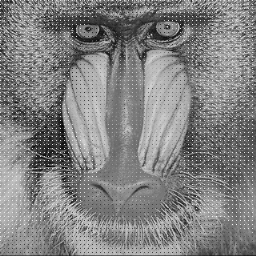

Imagen formada por el pixel (0,0) de cada bloque de 4x4 (escalada mediante Nearest Neighbours)


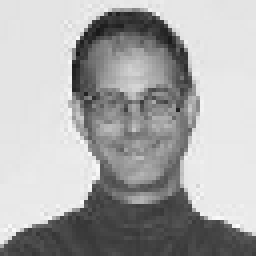

Imagen formada por el pixel (0,0) de cada bloque de 4x4 (escalada mediante Interpolación Bilineal)


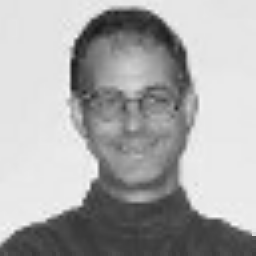

Imagen formada por el pixel (0,0) de cada bloque de 4x4 (escalada mediante Interpolación Bicúbica)


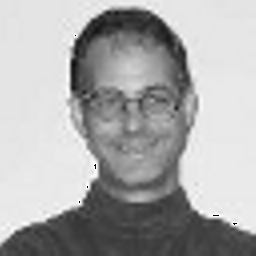

Imagen formada por el pixel (1,1) de cada bloque de 4x4 (escalada mediante Nearest Neighbours)


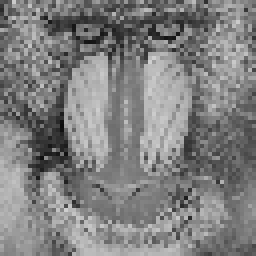

Imagen formada por el pixel (1,1) de cada bloque de 4x4 (escalada mediante Interpolación Bilineal)


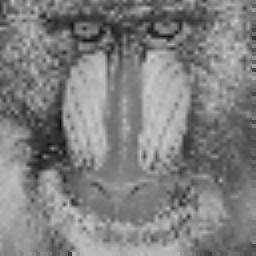

Imagen formada por el pixel (1,1) de cada bloque de 4x4 (escalada mediante Interpolación Bicúbica)


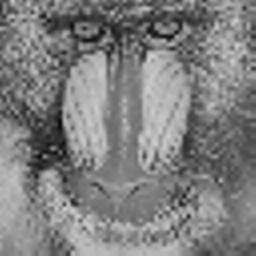

Imagen formada por promedio de cada bloque de 4x4 (escalada mediante Nearest Neighbours)


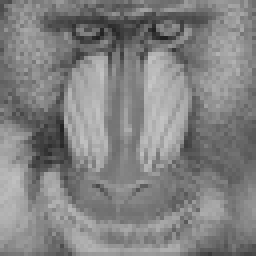

Imagen formada por promedio de cada bloque de 4x4 (escalada mediante Interpolación Bilineal)


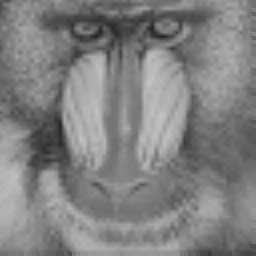

Imagen formada por promedio de cada bloque de 4x4 (escalada mediante Interpolación Bicúbica)


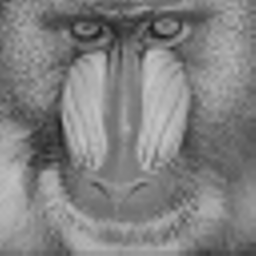

In [67]:
# Factor de escala
ratio = 4

im00_bilinear = bilinear(Image.fromarray(arr00, mode="L"), ratio)
im11_bilinear = bilinear(Image.fromarray(arr11, mode="L"), ratio)
im_avg_bilinear = bilinear(Image.fromarray(arr_avg, mode="L"), ratio)

# Coeficiente de interpolación bicubica (típicamente -0.5 o -0.75)
a = -1/2

arr00_bicubic = bicubic(arr00, ratio, a).reshape(64*ratio, 64*ratio)
arr11_bicubic = bicubic(arr11, ratio, a).reshape(64*ratio, 64*ratio)
arr_avg_bicubic = bicubic(arr_avg, ratio, a).reshape(64*ratio, 64*ratio)

print("Imagen original")
display(im)

print("Imagen formada por el pixel (0,0) de cada bloque de 4x4 (escalada mediante Nearest Neighbours)")
display(im00)
print("Imagen formada por el pixel (0,0) de cada bloque de 4x4 (escalada mediante Interpolación Bilineal)")
display(im00_bilinear)
print("Imagen formada por el pixel (0,0) de cada bloque de 4x4 (escalada mediante Interpolación Bicúbica)")
display(Image.fromarray(arr00_bicubic.astype(np.uint8)))

print("Imagen formada por el pixel (1,1) de cada bloque de 4x4 (escalada mediante Nearest Neighbours)")
display(im11)
print("Imagen formada por el pixel (1,1) de cada bloque de 4x4 (escalada mediante Interpolación Bilineal)")
display(im11_bilinear)
print("Imagen formada por el pixel (1,1) de cada bloque de 4x4 (escalada mediante Interpolación Bicúbica)")
display(Image.fromarray(arr11_bicubic.astype(np.uint8)))

print("Imagen formada por promedio de cada bloque de 4x4 (escalada mediante Nearest Neighbours)")
display(im_avg)
print("Imagen formada por promedio de cada bloque de 4x4 (escalada mediante Interpolación Bilineal)")
display(im_avg_bilinear)
print("Imagen formada por promedio de cada bloque de 4x4 (escalada mediante Interpolación Bicúbica)")
display(Image.fromarray(arr_avg_bicubic.astype(np.uint8)))

### Visualización del espectro de la imagen

Podemos obtener el espectro espacial de la imagen usando `numpy`.

Lo siguiente es simplemente una prueba para ver como un filtro pasa bajos y pasa altos afectaría a la imagen.

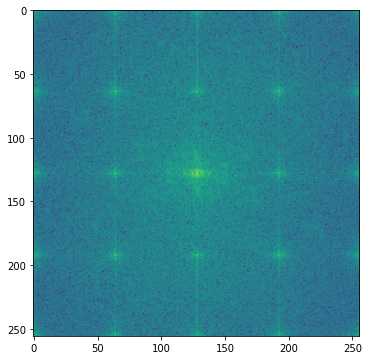

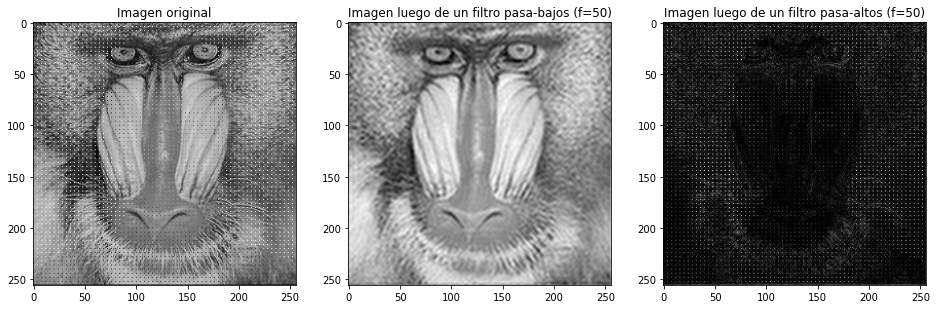

In [68]:
rows, cols = arr.shape
crow,ccol = int(rows/2) , int(cols/2)

plt.figure(figsize=(6, 6))
f = np.fft.fft2(arr)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.imshow(magnitude_spectrum)
plt.show()

f_filter = 50
fshift_hp = np.copy(fshift)
fshift_hp[crow-f_filter:crow+f_filter, ccol-f_filter:ccol+f_filter] = 0
fshift_lp = fshift - fshift_hp
f_ishift_lp = np.fft.ifftshift(fshift_lp)
img_lp = np.fft.ifft2(f_ishift_lp)
img_lp = np.abs(img_lp)
f_ishift_hp = np.fft.ifftshift(fshift_hp)
img_hp = np.fft.ifft2(f_ishift_hp)
img_hp = np.abs(img_hp)

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
ax[0].imshow(arr, cmap = 'gray')
ax[0].set_title('Imagen original')
ax[1].imshow(img_lp, cmap = 'gray')
ax[1].set_title(f'Imagen luego de un filtro pasa-bajos (f={f_filter})')
ax[2].imshow(img_hp, cmap = 'gray')
ax[2].set_title(f'Imagen luego de un filtro pasa-altos (f={f_filter})')

plt.show()

Se puede ver en el espectro que hay zonas de alta intensidad cada un cuarto del espectro. Esto se debe a la imagen que se encuentra superpuesta con la del mono con un periodo de 4 pixeles, es decir, un cuarto de la frecuencia de muestreo de la imagen.

En el caso del filtro pasa-bajos se observa que la grilla correspondiente a la imagen superpuesta prácticamente desaparece mientras que en el filtro pasaaltos se hace más visible.

A continuación se visualiza una de las imágenes que representan estos puntos de alta intensidad, las cual se compone de un coseno en cada eje con la frecuencia indicada por las coordenadas de los puntos. Al comparar esta imagen con la original se nota con mayor claridad la razón por la cual hay un pico en esta frecuencia espacial.

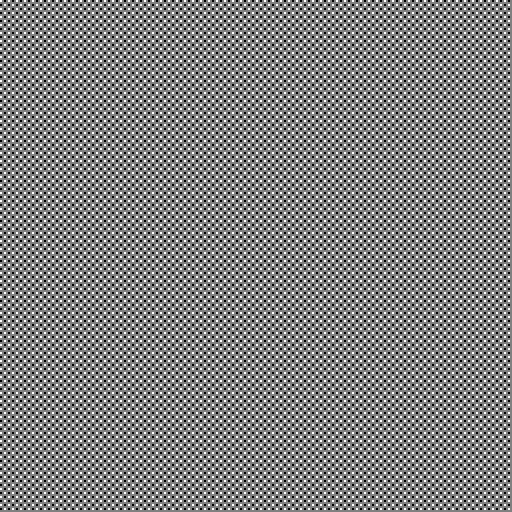

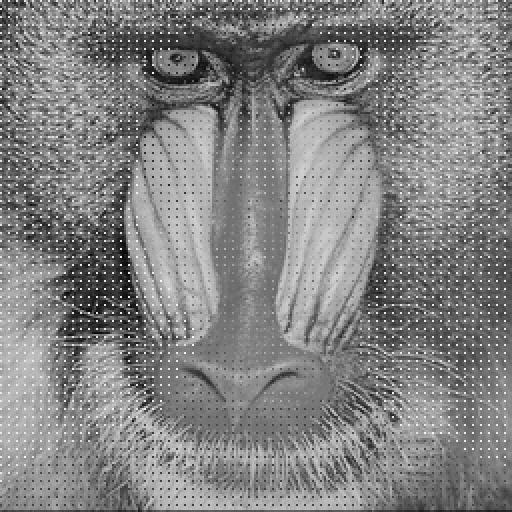

In [69]:
fx, fy = 64, 64

cos_arr = [[ np.cos(fy * y*2*np.pi/256) * np.cos(fx * x*2*np.pi/256) for x in range(256) ] for y in range(256) ]
cos_arr = (np.array(cos_arr)+1)/2 * 256
cos_img = Image.fromarray(np.clip(cos_arr, 0, 255).astype(np.uint8), mode="L")
display(cos_img.resize(np.array(cos_img.size)*2, Image.Resampling.NEAREST))
display(im.resize(np.array(im.size)*2, Image.Resampling.NEAREST))